In [9]:
import sympy as sp
from sympt import *
import numpy as np
import matplotlib.pyplot as plt

import sys
import os
sys.path.append("/home/leander/GoogleDriveSync/PhD/Python/")

from Packages.utils import multivariable_taylor_series
from Elliptical_Well import EllipticalConfinement
from Cylindrical_Magnet import CylindricalMagnet, BLinear


plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=18)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=16)    # fontsize of the tick labels
plt.rc('ytick', labelsize=16)    # fontsize of the tick labels
plt.rc('legend', fontsize=16)    # legend fontsize

# Transparent background for figures but keep the legend background white but its text color black
plt.rcParams['legend.facecolor'] = 'white'
plt.rcParams['legend.edgecolor'] = 'none'
plt.rcParams['legend.framealpha'] = 0.8
plt.rcParams['legend.shadow'] = False
plt.rcParams['figure.facecolor'] = 'none'
plt.rcParams['axes.facecolor'] = 'none'
# White spins, axis and ticks 
plt.rcParams['text.color'] = 'black'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'white'


In [10]:
H_conf = EllipticalConfinement()
H_conf.H

hbar*omega_x*(k_+*(1/2 + Dagger(a_+)*a_+) + k_-*(1/2 + Dagger(a_-)*a_-))

In [11]:
integral_expansion_order = 3
taylor_expansion_orders = [3, 3, 2] # x, y, z

In [12]:
x, y = sp.symbols('x y', real=True)
r_QD = sp.Matrix([x, y, 0])

Lx = sp.symbols('L_x', real=True, positive=True)

Dx, Dy, Dz = sp.symbols('Delta_x Delta_y Delta_z', real=True)
R, L = sp.symbols('R L', real=True)
Skyrmion = CylindricalMagnet(R * Lx, L * Lx, sp.Matrix([Dx * Lx, Dy * Lx, Dz * Lx]))
Bx, By, Bz = Skyrmion.B_integral_expansion(r_QD, order=integral_expansion_order)

In [14]:
print('Bx')    
Bx_linear = BLinear(Bx, taylor_expansion_orders[0], [x, y], [0, 0], 'b_x', {x: H_conf.x, y: H_conf.y})
print('By')
By_linear = BLinear(By, taylor_expansion_orders[1], [x, y], [0, 0], 'b_y', {x: H_conf.x, y: H_conf.y})
print('Bz')
Bz_linear = BLinear(Bz, taylor_expansion_orders[2], [x, y], [0, 0], 'b_z', {x: H_conf.x, y: H_conf.y})

print('Done')

Bx
By
Bz
Done


# Perturbation Regimes

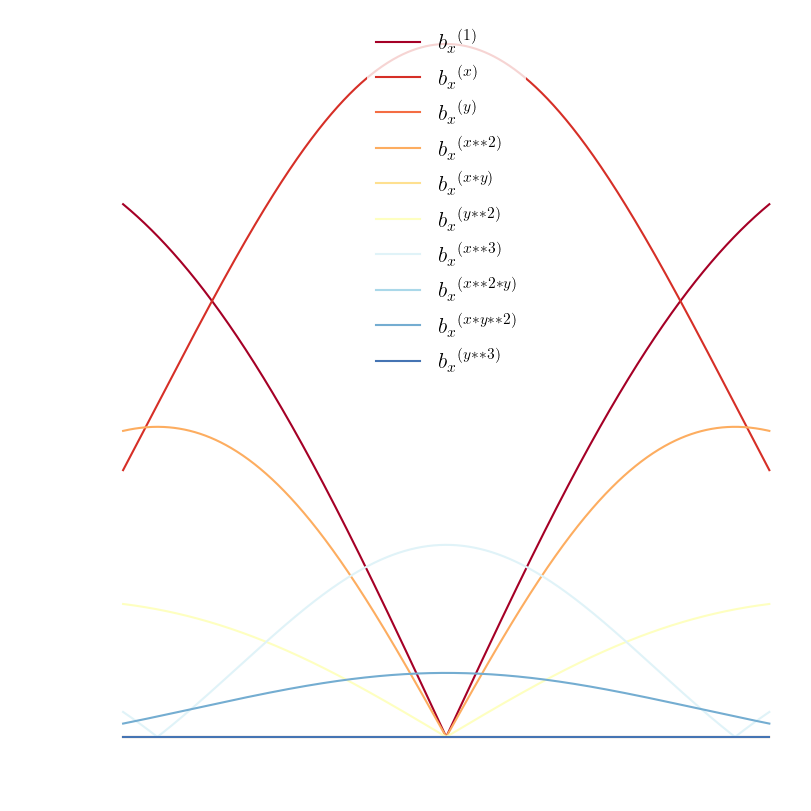

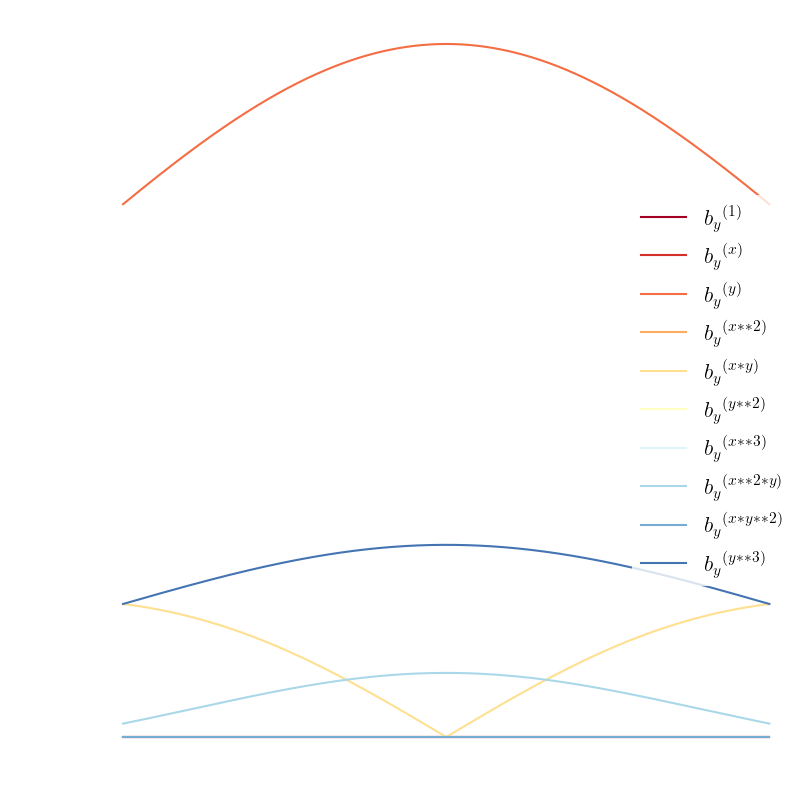

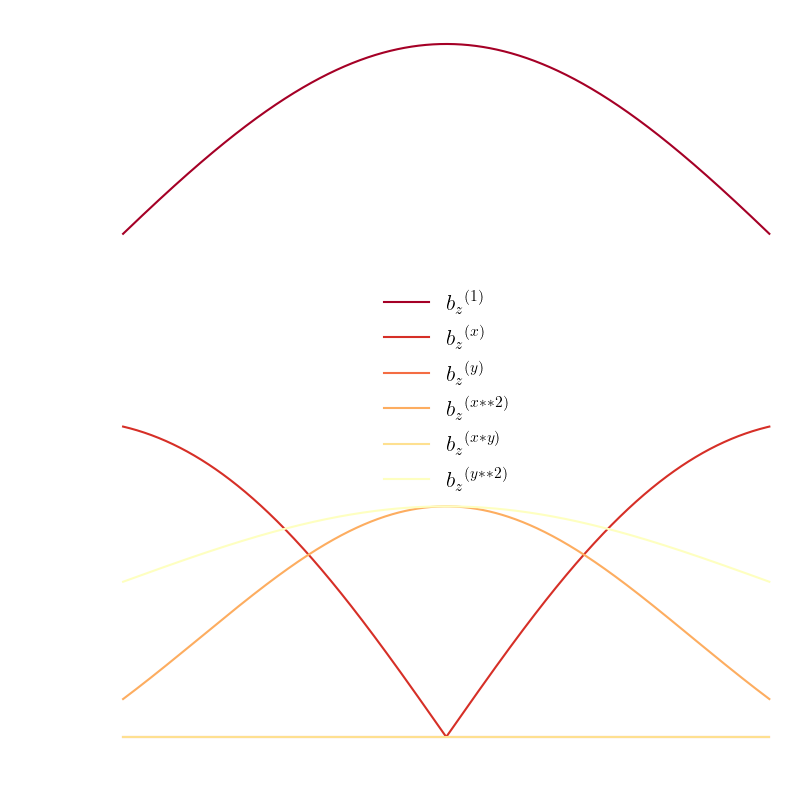

In [25]:
Dr = sp.symbols('Delta_r', real=True, positive=True)
xi_p = sp.symbols('xi_+', real=True, positive=True)
xi_m = sp.symbols('xi_-', real=True, positive=True)
phi = sp.symbols('phi', real=True)


values = {
    R : 0.1,
    L : 0.1,
    Dz : 3,
    Dx : Dr * sp.cos(phi),
    Dy : Dr * sp.sin(phi),
    Skyrmion.B0 : 1,
    Lx : 1
}

order_lambda = 1/5


cmap = plt.get_cmap('RdYlBu')

Drs = np.linspace(-1, 1, 1000)
phis = np.ones_like(Drs)* 0# np.pi/4


# Bx
fig, ax = plt.subplots(1, 1, figsize=(8, 8), constrained_layout=True)


for i, (key, value) in enumerate(Bx_linear.B_linear_values.items()):
    b = sp.lambdify([Dr, phi], value.subs(values), 'numpy')
    key = '$' + sp.latex(key) + '$'

    eff_B = np.abs(b(Drs, phis))
    ax.plot(Drs, eff_B, color=cmap(i / len(Bx_linear.B_linear_values)), label=key)
    #ax.plot(Drs, freq_series / omega_x * np.ones_like(Drs), color=cmap(i / len(Bx_linear.B_linear_values)), ls = '--')

ax.legend()

fig, ax = plt.subplots(1, 1, figsize=(8, 8), constrained_layout=True)

for i, (key, value) in enumerate(By_linear.B_linear_values.items()):
    b = sp.lambdify([Dr, phi], value.subs(values), 'numpy')
    key = '$' + sp.latex(key) + '$'

    eff_B = np.abs(b(Drs, phis))

    ax.plot(Drs, eff_B, color=cmap(i / len(Bx_linear.B_linear_values)), label=key)

ax.legend()

fig, ax = plt.subplots(1, 1, figsize=(8, 8), constrained_layout=True)

for i, (key, value) in enumerate(Bz_linear.B_linear_values.items()):
    b = sp.lambdify([Dr, phi], value.subs(values), 'numpy')
    key = '$' + sp.latex(key) + '$'

    eff_B = np.abs(b(Drs, phis))

    ax.plot(Drs, eff_B, color=cmap(i / len(Bx_linear.B_linear_values)), label=key)

ax.legend()
